In [1]:
import pandas as pd
import IPython.display as ipd
import numpy as np
from pathlib import Path
import librosa
import matplotlib.pyplot as plt
import os

import random
import soundfile as sf

import warnings

warnings.filterwarnings("ignore")

%load_ext autotime

* Get training data

In [2]:
train = pd.read_csv('Train.csv')
train.head()

,fn,label
0,audio_files/IV38R7F.wav,akawuka
1,audio_files/KM4SKWT.wav,banana
2,audio_files/F5POSU9.wav,obulwadde
3,audio_files/MMVDXG2.wav,nnyaanya
4,audio_files/9TVM96F.wav,pampu


In [3]:
train.label.nunique()

193

In [4]:
train.shape

(1109, 2)

<AxesSubplot:ylabel='Frequency'>

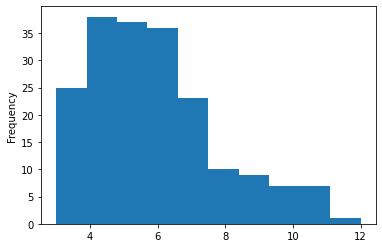

In [5]:
# Plot a histogram showing how common different counts are
train.groupby('label').count()['fn'].plot(kind='hist')

* New data

In [ ]:
os.listdir(main_dir)

In [ ]:
new_data = []

main_dir = "nlp_keywords/"

for word in os.listdir(main_dir):
    if not word.startswith('.'):
        content = os.listdir(main_dir + word)
        for file in content:
            file_name = main_dir + word + "/" + file
            new_data.append((file_name, word))
            print(file_name)

In [ ]:
main_dir = "latest_keywords/"

for word in os.listdir(main_dir):
    if not word.startswith('.'):
        content = os.listdir(main_dir + word)
        for file in content:
            file_name = main_dir + word + "/" + file
            new_data.append((file_name, word))
            print(file_name)

In [337]:
len(new_data)

3600

time: 1.79 ms


In [306]:
train_new = pd.DataFrame(new_data, columns=['fn', 'label'])

time: 2.08 ms


In [338]:
train_new.head()

,fn,label
0,nlp_keywords/okulimibwa/6fbfcce2cf21419e97290f...,okulimibwa
1,nlp_keywords/okulimibwa/d027264654b94950aeb204...,okulimibwa
2,nlp_keywords/okulimibwa/d027264654b94950aeb204...,okulimibwa
3,nlp_keywords/okulimibwa/d027264654b94950aeb204...,okulimibwa
4,nlp_keywords/okulimibwa/d027264654b94950aeb204...,okulimibwa


time: 13.4 ms


In [339]:
train_new.shape

(3600, 2)

time: 3.52 ms


* Augment new data

In [48]:
aug_size = 50

augmentation_config = {'noise_addition' : np.random.uniform(low=0.001, high=0.005, size=(aug_size,)),
                       'time_shift' : np.random.randint(low=2, high=10, size=aug_size),
                       'time_stretch' : np.random.uniform(low=0.5, high=0.9, size=(aug_size,)),
                       'pitch_shift' : np.random.randint(low=-4, high=4, size=aug_size)}

In [ ]:
i = 0

main_dir = 'nlp_keywords/'

for word in os.listdir(main_dir):
    if not word.startswith('.'):
        content = os.listdir(main_dir + word)
        for file in content:
            file_name = main_dir + word + "/" + file
            try:
                wav, sr = librosa.load(file_name,sr=None)
                i = i + 1
            except Exception as e:
                print(e)
                break
    break
    
#UserWarning: PySoundFile failed. Trying audioread instead.
#warnings.warn("PySoundFile failed. Trying audioread instead.")

In [340]:
wav, sr = librosa.load(file_name,sr=None)

time: 88.4 ms


In [341]:
len(aug_data)

10955

time: 2.33 ms


In [ ]:
for index, row in train_new.iterrows():
    #Path()
    wav, sr = librosa.load(row["fn"],sr=None)
    
    new_name_prefix = 'audio_files_augmented/' + row["fn"].split('/')[-1].split('.')[0]
    
    n_operations = np.random.randint(low=1, high=5)
    # add noise
    for i in range(n_operations):
        factor = np.random.uniform(low=0.001, high=0.005)
        wav_n = wav + factor*np.random.normal(0,1,len(wav))
        new_name = new_name_prefix + '_noise_' + str(factor).split('.')[-1] +'.wav'
        #librosa.output.write_wav(new_name,wav_n,sr)
        sf.write(new_name, wav_n, sr)
        aug_data.append((new_name, row["label"]))
        print(new_name)
    
    n_operations = np.random.randint(low=1, high=5)
    # add time shift
    for i in range(n_operations):
        factor = np.random.randint(low=2, high=10)
        wav_n = np.roll(wav,int(sr/factor))
        new_name = new_name_prefix + '_shift_' + str(factor).split('.')[-1] +'.wav'
        sf.write(new_name, wav_n, sr)
        aug_data.append((new_name, row["label"]))
        print(new_name)
    
    n_operations = np.random.randint(low=1, high=5)
    # add time stretch
    for i in range(n_operations):
        factor = np.random.uniform(low=0.5, high=0.9)
        wav_n = librosa.effects.time_stretch(wav,factor)
        new_name = new_name_prefix + '_stretch_' + str(factor).split('.')[-1] +'.wav'
        sf.write(new_name, wav_n, sr)
        aug_data.append((new_name, row["label"]))
        print(new_name)
    
    n_operations = np.random.randint(low=1, high=5)
    # add pitch shift
    for i in range(n_operations):
        factor = np.random.randint(low=-4, high=4)
        wav_n = librosa.effects.pitch_shift(wav,sr,n_steps=factor)
        new_name = new_name_prefix + '_pitch_' + str(factor).split('.')[-1] +'.wav'
        sf.write(new_name, wav_n, sr)
        aug_data.append((new_name, row["label"]))
        print(new_name)

In [347]:
len(aug_data)

47019

time: 2.52 ms


In [348]:
train_aug = pd.DataFrame(aug_data, columns=['fn', 'label'])

time: 20 ms


<AxesSubplot:ylabel='Frequency'>

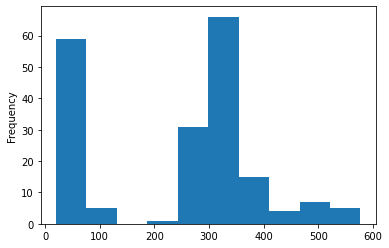

time: 235 ms


In [349]:
# Plot a histogram showing how common different counts are
train_aug.groupby('label').count()['fn'].plot(kind='hist')

In [350]:
train.shape, train_aug.shape

((1109, 2), (47019, 2))

time: 2.59 ms


<AxesSubplot:ylabel='Frequency'>

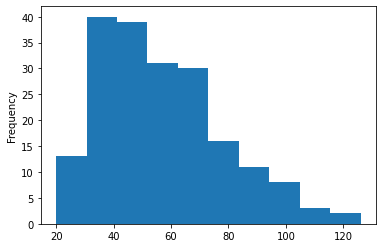

In [65]:
# Plot a histogram showing how common different counts are
train_aug.groupby('label').count()['fn'].plot(kind='hist')

In [475]:
train.shape, train_aug.shape

((1109, 2), (47019, 2))

time: 1.91 ms


In [491]:
df = pd.concat([train, train_aug]).reset_index(drop=True)

time: 7.51 ms


In [476]:
#df = pd.concat([train, train_new]).reset_index(drop=True)

time: 2.38 ms


In [492]:
df.shape #12064

(48128, 2)

time: 1.98 ms


In [493]:
df.head(2)

,fn,label
0,audio_files/IV38R7F.wav,akawuka
1,audio_files/KM4SKWT.wav,banana


time: 6.09 ms


In [354]:
#df.to_csv('submission_1_train_data.csv', index=False)
df.to_csv('submission_2_train_data.csv', index=False)

time: 165 ms


# Preprocessing

In [ ]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split 

In [74]:
def extract_features(file_name):
   
    try:
        audio, sample_rate = librosa.load(file_name, res_type='kaiser_fast') 
        mfccs = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
        mfccsscaled = np.mean(mfccs.T, axis=0)
        
    except Exception as e:
        print("Error encountered while parsing file: ", file)
        return None 
     
    return mfccsscaled

In [494]:
features = []

for index, row in df.iterrows():
    
    data = extract_features(row["fn"]) #Path(row["fn"])
    
    features.append([data, row['label']])

time: 23min 27s


In [495]:
featuresdf = pd.DataFrame(features, columns=['feature','class_label'])

time: 21.8 ms


In [496]:
featuresdf.shape #1109

(48128, 2)

time: 2.11 ms


In [497]:
featuresdf['feature'].isnull().sum()

0

time: 8.91 ms


In [498]:
# Convert features and corresponding classification labels into numpy arrays
X = np.array(featuresdf.feature.tolist())
y = np.array(featuresdf.class_label.tolist())

# Encode the classification labels
le = LabelEncoder()
yy = to_categorical(le.fit_transform(y)) 

time: 71.7 ms


In [361]:
x_train, x_test, y_train, y_test = train_test_split(X, yy, test_size=0.2, random_state = 42)

time: 35.1 ms


In [362]:
featuresdf.loc[0, 'feature'].shape

(40,)

time: 5.62 ms


In [363]:
x_train.shape, x_test.shape

((38502, 40), (9626, 40))

time: 2.47 ms


# Modeling v1 : Wavenet

In [364]:
import tensorflow as tf
from tensorflow.keras.utils import HDF5Matrix
from tensorflow.keras import backend as K
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Input, Dense, Conv2D, Add, MaxPooling2D
from tensorflow.keras.layers import Lambda, Concatenate, concatenate, Activation, Dropout, Flatten
from tensorflow.keras.regularizers import l2
from tensorflow.keras.initializers import TruncatedNormal
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

import numpy as np
from sklearn import metrics

time: 697 µs


In [365]:
num_rows = 40
num_columns = 1
num_channels = 1

x_train = x_train.reshape(x_train.shape[0], num_rows, num_columns, num_channels)
x_test = x_test.reshape(x_test.shape[0], num_rows, num_columns, num_channels)

num_labels = yy.shape[1]
filter_size = 2

time: 762 µs


In [366]:
x_train.shape

(38502, 40, 1, 1)

time: 2.06 ms


In [ ]:
best_acc=0.5

In [367]:
def DC_CNN_Block(nb_filter, filter_length, dilation, l2_layer_reg):

    def f(input_):
        residual = input_
        layer_out = Conv2D(filters=nb_filter,
                           kernel_size=filter_length,
                           dilation_rate=dilation,
                           activation='linear',
                           padding='same', #'causal'
                           use_bias=False,
                           kernel_initializer=TruncatedNormal(mean=0.0,
                                                              stddev=0.05,
                                                              seed=42),
                           kernel_regularizer=l2(l2_layer_reg))(input_)
        
        layer_out = Activation('selu')(layer_out)
        
        skip_out = Conv2D(1,(1,1),
                          activation='linear',
                          use_bias=False,
                          kernel_initializer=TruncatedNormal(mean=0.0,
                                                             stddev=0.05,
                                                             seed=42),
                          kernel_regularizer=l2(l2_layer_reg))(layer_out)
        network_in = Conv2D(1,(1,1),
                            activation='linear',
                            use_bias=False,
                            kernel_initializer=TruncatedNormal(mean=0.0,
                                                               stddev=0.05,
                                                               seed=42),
                            kernel_regularizer=l2(l2_layer_reg))(layer_out)
        network_out = Add()([residual, network_in])
        return network_out, skip_out
    return f



def create_model(learning_rate,
                 n_filters, filter_width, dilation, cnn_dropout, num_dense_nodes, dense_dropout):
    
    cnn_input = Input(batch_shape=(None, 128, 216, 1))

    # Define an input history series and pass it through a stack of dilated causal convolutions. 
    l1a, l1b = DC_CNN_Block(n_filters,filter_width,dilation**0,0.001)(cnn_input)    
    l2a, l2b = DC_CNN_Block(n_filters,filter_width,dilation**1,0.001)(l1a) 
    l3a, l3b = DC_CNN_Block(n_filters,filter_width,dilation**2,0.001)(l2a)
    l4a, l4b = DC_CNN_Block(n_filters,filter_width,dilation**3,0.001)(l3a)
    #l5a, l5b = DC_CNN_Block(n_filters,filter_width,dilation**4,0.001)(l4a)
    #l6a, l6b = DC_CNN_Block(n_filters,filter_width,dilation**5,0.001)(l5a)
    #l6b = Dropout(cnn_dropout)(l6b) # Dropout used to limit influence of earlier data
    #l7a, l7b = DC_CNN_Block(n_filters,filter_width,dilation**6,0.001)(l6a)
    #l7b = Dropout(cnn_dropout)(l7b) # Dropout used to limit influence of earlier data
    #l8 = Add()([l1b, l2b, l3b, l4b, l5b, l6b, l7b])
    
    l4b = Dropout(cnn_dropout)(l4b)
    l8 = Add()([l1b, l2b, l3b, l4b])
    l9 = Activation('relu')(l8)
    
    #l19=MaxPooling1D(2)(l9)
    #l10 = Dense(num_dense_nodes, activation='relu')(l9)
    #l11 = Dropout(dense_dropout)(l10)
    #model = Model(cnn_input, main_out)
   
    pool2 = MaxPooling2D(pool_size=(2, 2))(l9)
    flat = Flatten()(pool2)
    
    hidden1 = Dense(num_dense_nodes, activation='relu')(flat)
    output = Dense(n_classes, activation='sigmoid')(hidden1)
    
    model = Model(inputs=cnn_input, outputs=output)
    model.compile(optimizer=Adam(lr=learning_rate), 
                           loss='sparse_categorical_crossentropy',
                           metrics='accuracy')
    
    print(model.summary())
    
    return model

time: 153 ms


In [376]:
learning_rate = 0.01
n_filters = 32
filter_width = (4, 4)
dilation = 3
cnn_dropout = 0.2
num_dense_nodes = 64
dense_dropout = 0.2
mini_batch = 128
num_epoch = 30

time: 467 µs


In [ ]:
model = create_model(learning_rate=learning_rate,
                     n_filters=n_filters,
                     filter_width=filter_width,
                     dilation=dilation,
                     cnn_dropout=cnn_dropout,
                     num_dense_nodes=num_dense_nodes,
                     dense_dropout=dense_dropout)

In [378]:
reduce_lr = ReduceLROnPlateau(monitor='loss', factor=0.5,
                              patience=5, min_lr=0.001)
early_stop = EarlyStopping(monitor='val_loss', patience=5)

time: 469 µs


In [ ]:
#(128, 216, 1) (126, 214, 1)
history = model.fit(train_x, train_y,
                    batch_size=mini_batch,
                    epochs=num_epoch, 
                    validation_data=(test_x, test_y))

In [402]:
# first run
accuracy = model.evaluate(x_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 75.15%
time: 10.4 ms


In [474]:
model.save_model('models/wavenet_sub1_75.model')

time: 93.1 ms


### Hyperparamer optimization

In [ ]:
from skopt.space import Real, Integer
from skopt import gp_minimize
from skopt.utils import use_named_args

In [ ]:
def run_hyperparams_opt(n_calls, default_parameters):

    # Hyperparameters
    dim_learning_rate = Real(low=1e-5, high=1e-1, prior='log-uniform', name='learning_rate')
    dim_n_filters = Integer(low=16, high=64, name='n_filters')
    dim_filter_width = Integer(low=2, high=8, name='filter_width')
    dim_dilation = Integer(low=2, high=4, name='dilation')
    dim_cnn_dropout = Real(low=.2, high=.8, prior='uniform', name='cnn_dropout')
    dim_dilation = Integer(low=2, high=4, name='dilation')
    dim_num_dense_nodes = Integer(low=128, high=2056, name='num_dense_nodes')
    dim_dense_dropout = Real(low=0.2,high=.6, prior='uniform', name='dense_dropout')
    dim_mini_batch = Integer(low=4, high=8, name='mini_batch')
    dim_num_epoch = Integer(low=10, high=150, name='num_epoch')

    dimensions = [dim_learning_rate,
                  dim_n_filters,
                  dim_filter_width,
                  dim_dilation,
                  dim_cnn_dropout,
                  dim_num_dense_nodes,
                  dim_dense_dropout,
                  dim_mini_batch,
                  dim_num_epoch
                  ]
    
    @use_named_args(dimensions=dimensions)
    def fitness(learning_rate, n_filters, filter_width, dilation,
                cnn_dropout,num_dense_nodes, dense_dropout, mini_batch, num_epoch):

        # Print the hyper-parameters.
        print('learning rate: {0:.1e}'.format(learning_rate))
        print('n_filters', n_filters)
        print('filter_width:', filter_width)
        print('dilation:', dilation)
        print('cnn_dropout:', cnn_dropout)
        print('num_dense_nodes:', num_dense_nodes)
        print('dense_dropout:', dense_dropout)
        print('mini_batch:', mini_batch)
        print('num_epoch:', num_epoch)

        # Create the neural network with these hyper-parameters.
        parallel_model, model = create_model(learning_rate=learning_rate,
                                             n_filters=n_filters,
                                             filter_width=filter_width,
                                             dilation=dilation,
                                             cnn_dropout=cnn_dropout,
                                             num_dense_nodes=num_dense_nodes,
                                             dense_dropout=dense_dropout)

        
        # Use Keras to train the model.
        history = parallel_model.fit(x=X_train,
                                     y=[y_train], 
                                     validation_data=validation_data,
                                     shuffle="batch",
                                     verbose=2,
                                     epochs=num_epoch,
                                     batch_size=(2**mini_batch)
                                    )
        
        params = [learning_rate, n_filters, filter_width, dilation,
                  cnn_dropout,num_dense_nodes, dense_dropout, mini_batch, num_epoch]
        
        history = history.history['val_accuracy']
        acc = history[-1]

        global best_acc

        if acc < best_acc:
            # Update the regression error.
            best_acc = acc

        # Delete the Keras model with these hyper-parameters from memory.
        del model
        K.clear_session()

        return acc
    
    _ = gp_minimize(func=fitness,
                    dimensions=dimensions,
                    acq_func='EI', # Expected Improvement
                    n_calls=n_calls,
                    x0=default_parameters)
    
    return print("Hyper parameter tunig completed")

In [ ]:
default_parameters = [learning_rate, n_filters, filter_width, dilation,
                      cnn_dropout,num_dense_nodes, dense_dropout, mini_batch, num_epoch]

In [ ]:
run_hyperparams_opt(n_calls, default_parameters)

# 3. Predict & export

In [449]:
ss = pd.read_csv('SampleSubmission.csv')
ss.head()

,fn,maize streak virus,disease,okukkoola,muwogo,mpeke,mucungwa,greens,garden,mango,...,kasaanyi,suckers,insects,fertilizer,nakavundira,ekiwojjolo,akawuka,ddagala,ebiwojjolo,obutungulu
0,audio_files/00118N3.wav,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,audio_files/00P0NMV.wav,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,audio_files/01QEEZI.wav,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,audio_files/037YAED.wav,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,audio_files/0382N0Y.wav,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


time: 51.8 ms


In [450]:
ss['fn'].nunique()

1017

time: 2.66 ms


In [460]:
x_pred

array([-2.64064209e+02,  1.15357208e+02,  3.56422844e+01,  7.15047216e+00,
       -4.45182705e+00,  2.60328808e+01, -9.96319771e+00, -9.29498196e+00,
       -3.96354318e+00, -7.21372032e+00,  1.45025980e+00,  2.17741752e+00,
       -7.71069908e+00, -9.35525513e+00, -1.01593390e+01, -4.18746996e+00,
       -9.13389587e+00, -7.35200500e+00, -1.22530775e+01, -1.59574676e+00,
       -1.39254560e+01, -1.26553082e+00, -1.03319435e+01, -4.59925365e+00,
       -9.66093636e+00, -1.03653714e-01, -4.37230873e+00, -3.80314350e+00,
       -4.88327837e+00,  3.22384119e+00, -3.65958643e+00,  6.57472372e-01,
       -6.41588688e-01,  1.15996277e+00, -5.62780380e-01,  2.28736830e+00,
       -2.05051184e+00,  1.59229243e+00, -2.05104208e+00,  1.22838104e+00],
      dtype=float32)

time: 2.61 ms


In [466]:
x_test[0].reshape(1, -1).shape

(1, 40)

time: 2.19 ms


In [468]:
for index, row in ss.iterrows():
    
    x_pred = extract_features(Path(row["fn"]))
    
    #print(data.shape)
    #print(x_pred.shape)
    #x_pred = data.reshape(1, num_rows, num_columns, num_channels)
    
    y_pred = model.predict_proba(x_pred.reshape(1, -1))
    
    #label = le.inverse_transform(y_pred)
    #labels = le.inverse_transform([i for i in range(num_labels)])
    #print(x_pred.shape, y_pred.shape)
    #print(labels.shape)
    
    labels = model.classes_
    
    ss.loc[index, list(labels)] = y_pred[0]

time: 1min 30s


In [470]:
ss.head()

,fn,maize streak virus,disease,okukkoola,muwogo,mpeke,mucungwa,greens,garden,mango,...,kasaanyi,suckers,insects,fertilizer,nakavundira,ekiwojjolo,akawuka,ddagala,ebiwojjolo,obutungulu
0,audio_files/00118N3.wav,0.032328,0.000092,0.007790,0.002580,0.000098,0.003589,0.000578,0.000713,0.000067,...,0.021406,0.030142,0.000363,0.001165,0.001128,0.004206,0.003041,0.000584,0.000523,0.000403
1,audio_files/00P0NMV.wav,0.000552,0.000329,0.000743,0.000144,0.001476,0.002749,0.000224,0.000206,0.000302,...,0.017953,0.000245,0.000700,0.002161,0.037411,0.002416,0.003280,0.000757,0.003659,0.008395
2,audio_files/01QEEZI.wav,0.000153,0.000323,0.000911,0.009937,0.000833,0.006951,0.000050,0.000098,0.000136,...,0.000061,0.000086,0.000254,0.000232,0.000195,0.003479,0.000752,0.000035,0.001469,0.001130
3,audio_files/037YAED.wav,0.000206,0.000434,0.000345,0.059580,0.000632,0.004742,0.000410,0.001577,0.000178,...,0.001242,0.000431,0.000257,0.000150,0.000549,0.000599,0.000392,0.000056,0.000214,0.000831
4,audio_files/0382N0Y.wav,0.001951,0.000371,0.000335,0.001408,0.011309,0.007171,0.000338,0.000155,0.000387,...,0.001145,0.000174,0.000978,0.000717,0.001937,0.007227,0.000716,0.000462,0.013299,0.005215


time: 20.1 ms


In [471]:
ss.set_index(ss['fn'], drop=True).drop('fn', 1).apply(sum, axis=1).mean()

1.000000001168189

time: 31.4 ms


In [473]:
ss.to_csv('output/Submission2.csv', index=False)

time: 414 ms
